# Scikit-learn exercises

## 0. EDA

### a)

In [1]:
import seaborn as sns
import pandas as pd



In [4]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [63]:
df.describe()
df[df["mpg"] == df["mpg"].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d


In [11]:
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [12]:
df["name"].describe()

count            398
unique           305
top       ford pinto
freq               6
Name: name, dtype: object

In [17]:
df_mpg = df.dropna()
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


### b)

In [25]:
df_mpg[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


### c)

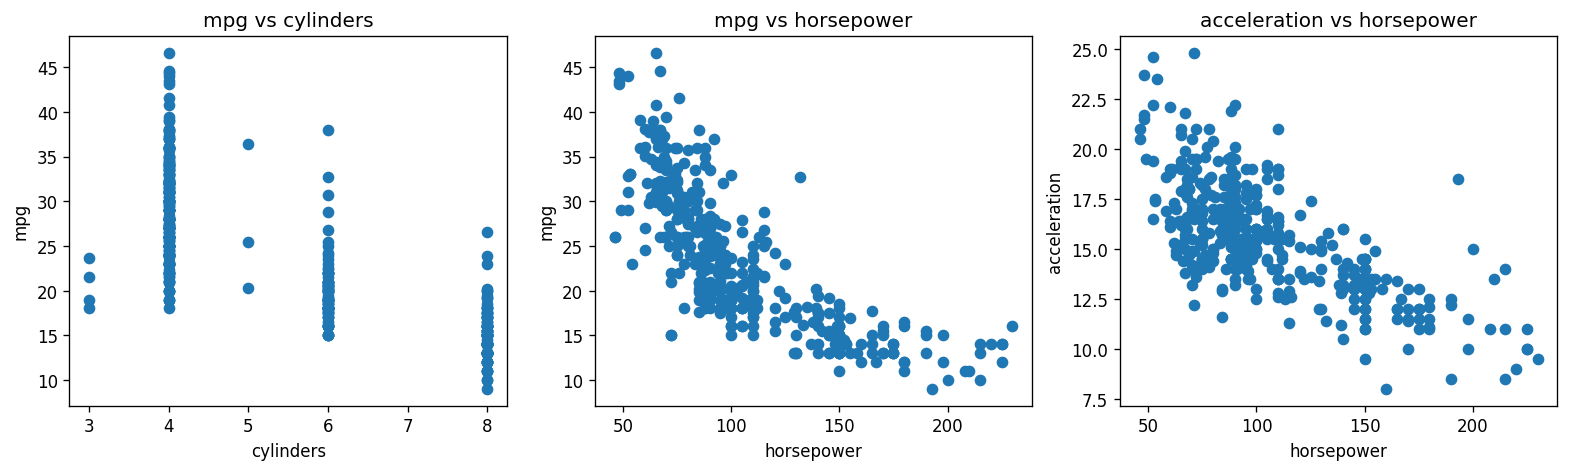

In [59]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, dpi=120, figsize=(16,4))
x_columns = ["cylinders", "horsepower", "horsepower"]
y_columns = ["mpg", "mpg", "acceleration"]
titles = ["mpg vs cylinders", "mpg vs horsepower", "acceleration vs horsepower"]

for ax, x_column, y_column, title in zip(axes, x_columns, y_columns, titles):
    ax.scatter(data=df_mpg, x=x_column, y=y_column)
    ax.set(title = title, ylabel=y_column, xlabel=x_column)


### d)

In [37]:
df_mpg_adjusted = df_mpg.drop(["origin", "name"], axis="columns")

In [38]:
df_mpg_adjusted

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


## 1. Train|test split

In [44]:
X, y = df_mpg_adjusted.drop("mpg", axis="columns"), df_mpg_adjusted["mpg"]

X

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


In [45]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split

# help(train_test_split)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# check that it adds up to 392
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (313, 6)
y_train.shape = (313,)
X_test.shape = (79, 6)
y_test.shape = (79,)


In [65]:
X_test.head(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year
79,4,96.0,69.0,2189,18.0,72
276,4,121.0,115.0,2795,15.7,78
248,4,91.0,60.0,1800,16.4,78
56,4,91.0,70.0,1955,20.5,71
393,4,140.0,86.0,2790,15.6,82
205,4,97.0,75.0,2155,16.4,76
43,8,400.0,170.0,4746,12.0,71
235,4,97.0,75.0,2265,18.2,77
152,6,225.0,95.0,3264,16.0,75
117,4,68.0,49.0,1867,19.5,73


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()


def trainlr(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae, mse, rmse = (
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
    )

    return f"MAE: {mae.round(2)}, MSE: {mse.round(2)}, RMSE: {rmse.round(2)}"

In [70]:
print(trainlr(X_train, X_test, y_train, y_test, model))

MAE: 2.5, MSE: 10.5, RMSE: 3.24
